# Supervised Learning Methods using Python

[supervised learning](https://medium.com/@himanshuit3036/supervised-learning-methods-using-python-bb85b8c4e0b7)

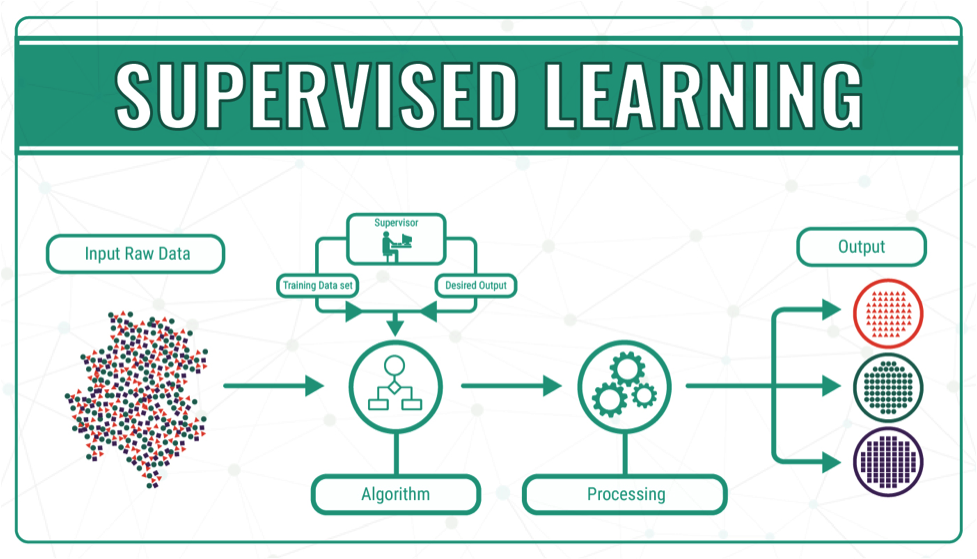

In [2]:
from IPython.display import Image 
Image('supervised_learning.png', width= 400, height = 200) 

Machine Learning can be classified as of three types:
* Supervised Learning  
* Unsupervised Learning  
* Reinforcement Learning

El aprendizaje automático se puede clasificar en tres tipos:
* Aprendizaje supervisado 
* Aprendizaje no supervisado
* Aprendizaje reforzado

El aprendizaje supervisado es el área del Machine Learning donde tenemos un conjunto de variables independientes que nos ayuda a analizar la variable dependiente y la relación entre ellas.

Todo lo que queremos predecir se denomina Variable dependiente, mientras que las variables que usamos para predecir se denominan Variables independientes.

Supongamos que queremos predecir la edad de la persona en función de la altura y el peso de la persona, entonces la altura y el peso serán las variables independientes, mientras que la edad será la variable dependiente.

Hablaremos de esto en detalle y aplicaremos todos los algoritmos para verificar la precisión comparativa.

El aprendizaje no supervisado es el área en la que no tenemos ninguna variable dependiente.

Solo tenemos una colección de variables e intentamos encontrar similitudes entre ellas y clasificarlas en grupos.

El aprendizaje por refuerzo es un campo en el que la máquina realiza acciones y observa los resultados.

Con base en los resultados, aprende y luego repite el proceso nuevamente hasta que comprende todo el fenómeno de la relación de acción y resultado.

El aprendizaje no supervisado y por refuerzo están fuera del alcance de esta publicación. Para saber más sobre ellos, haga clic aquí.

En este post vamos a hablar sobre los métodos de aprendizaje supervisado y sus aplicaciones en Python.

Generalmente, el aprendizaje supervisado se utiliza para problemas de clasificación, en los que predecimos si un conjunto de datos pertenecerá a una categoría u otra.

En esta publicación exploraremos el conjunto de datos [Titanic](https://www.kaggle.com/c/titanic/data?select=train.csv), de Kaggle.

Hay 11 variables con las que tenemos que predecir si una persona sobrevivirá al accidente o no.

Exploremos el conjunto de datos antes de aplicar diferentes algoritmos para la predicción.

In [4]:
import pandas as pd
titanic=pd.read_csv("train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Pandas se utiliza para manipulaciones de tablas.

Using Pandas package we are going to upload the Titanic Training Set and then using the `head()` function we will look at the first five rows. 

Usando el paquete Pandas vamos a cargar el Titanic Training Set y luego usando la función `head()` veremos las primeras cinco filas.

You can see that we have 12 variables: 11 Independent and 1 Dependent (Survived Column)


Puede ver que tenemos 12 variables: 11 independientes y 1 dependiente (`Survived Column`)

Ahora que conocemos el conjunto de datos, primero hablemos de los algoritmos supervisados que vamos a aplicar en el conjunto de datos anterior:

1. Logistic Regression
2. K-NN Algorithm
3. Naive Bayes Theorem
4. Linear Support Vector Machines
5. Non-Linear Support Vector Machines
6. Decision Trees
7. Random Forest

En este post no voy a explicar todos los algoritmos.

Explicaré la aplicación de ellos en el conjunto de datos anterior.

Pero para aquellos que también quieren las explicaciones, les he dado los enlaces de los mejores sitios que explican los algoritmos anteriores.

Así que comencemos el proceso. 

La aplicación de todas las cosas se puede dividir en las siguientes partes:

1. Data Pre-processing & Cleansing
2. Splitting Data into Training and Test Set
3. Applying all the above algorithms
4. Comparing the accuracy scores

Comenzaremos con el preprocesamiento de datos del conjunto de datos Titanic.

Los pasos de preprocesamiento se indican a continuación:

1. Divide the Data into two Data Frames: Categorical & Numerical
2. Categorical will contain all the columns from the data set which contain Categories. Numerical   
   will contain all the columns containing Numbers.
3. We will drop the columns from both the Data Frames if:
   a. Column is not important
   b. Column contains more than 80% Null Values

4. Next we will take care of Null Values. If null values are less than 80% in a column then we will   
   replace it with the category having maximum count in the column (for Categorical Columns) or with  
   the mean of the column (for Numerical Columns)
5. If a column has around 60–80% null values, and we feel that the column is important, we can create  
   a new category replacing all the null values.

6. For the Numerical Columns, we will plot the box plot and see if there are any outliers. Then we   
   will replace the outliers from the data as well.
7. Let’s apply all the above approaches in the Data Set.   

In [6]:
import numpy as np 

In [7]:
titanic_cat = titanic.select_dtypes(object)
titanic_num = titanic.select_dtypes(np.number)

In [8]:
titanic_cat 

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [9]:
titanic_num 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


Las líneas anteriores crearán dos marcos de datos.

A continuación se muestra una que contiene categorías, una `Numbers.head ()` de ellas:

Veamos primero el marco de datos categórico.

Podemos eliminar la columna de tickets y la columna de nombre, ya que no son importantes para hacer nuestro modelo.

In [11]:
titanic_cat.drop(['Name','Ticket'], axis=1, inplace=True) 

KeyError: "['Name' 'Ticket'] not found in axis"

Ahora nuestros datos se verán así:

In [12]:
titanic_cat 

,Sex,Cabin,Embarked
0,male,NaN,S
1,female,C85,C
2,female,NaN,S
3,female,C123,S
4,male,NaN,S
...,...,...,...
886,male,NaN,S
887,female,B42,S
888,female,NaN,S
889,male,C148,C


El siguiente paso es mirar los valores nulos presentes en las columnas anteriores:

In [13]:
titanic_cat.isnull().sum()

Sex           0
Cabin       687
Embarked      2
dtype: int64

Entonces, tenemos 687 valores nulos en la columna de cabina y 2 en la columna embarcada. 

Tenemos 891 filas en total, mientras que 687 contienen valores nulos en Cabin.

El porcentaje de valores nulos se sitúa en torno al 77%.

Esto es aproximadamente igual al 80%.

O podemos eliminar la fila o podemos reemplazarla por la categoría de conteo máximo.

Por ahora, hagamos el reemplazo.

In [14]:
titanic_cat.Cabin.fillna(titanic_cat.Cabin.value_counts().idxmax(), inplace=True)
titanic_cat.Embarked.fillna(titanic_cat.Embarked.value_counts().idxmax(), inplace=True)

C:\Users\Usuario\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Las dos líneas anteriores reemplazarán todos los valores nulos presentes con la categoría de recuento máximo.

Ahora podemos verificar nuevamente los valores nulos y luego podemos obtener el siguiente resultado:

In [16]:
titanic_cat.isnull().sum()  

Sex         0
Cabin       0
Embarked    0
dtype: int64

In [20]:
titanic_cat.Cabin.value_counts().idxmax()  

'G6'